# Loan Data Exploration
## by Yaron Shamash

## Preliminary Wrangling

This document explores a dataset containing loan amounts, borrower information, and interest rates for approximately 114,000 loans.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
loans= pd.read_csv('prosperLoanData.csv')

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
print(loans.shape)
print(loans.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [5]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

Number of observations (data points): There are 113,937 with 81 columns describing the data. The characteristics of the variables in the data set. Which includes: dtypes: bool(3), category(1), float64(50), int64(11), object(17) How many are discrete/continuous

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the APR or interest rate of the loans in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the loan amount will have the strongest effect on each loan's APR: the larger the loan, the higher the interest rate. I also think that other factors such as borrower credit rating, debt/income ratio and income will have effects on the APR, though to a much smaller degree than the main effect of loan amount.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: loan APR.

In [6]:
loans.duplicated().sum()

0

In [7]:
loans.duplicated(subset='LoanNumber').sum()

871

In [8]:
loans.drop_duplicates('LoanNumber',inplace=True)

In [9]:
loans.duplicated().sum()

0

In [10]:
loans.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84113
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

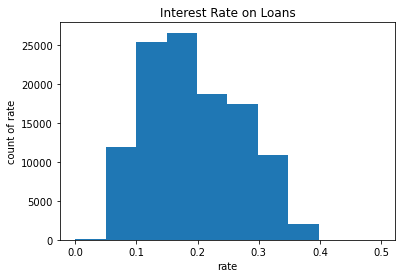

In [11]:
plt.hist(data = loans, x = 'BorrowerRate')
plt.title('Interest Rate on Loans')
plt.xlabel('rate')
plt.ylabel('count of rate')
plt.show()

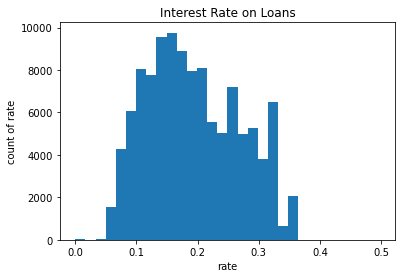

In [12]:
plt.hist(data = loans, x = 'BorrowerRate', bins=30)
plt.title('Interest Rate on Loans')
plt.xlabel('rate')
plt.ylabel('count of rate')
plt.show()

In [13]:
loans.BorrowerRate.describe()

count    113066.000000
mean          0.192946
std           0.074917
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250600
max           0.497500
Name: BorrowerRate, dtype: float64

In [14]:
# to set the scale
np.log10(loans.BorrowerRate.describe())

C:\Users\Yaron\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.053332
mean    -0.714565
std     -1.125422
min          -inf
25%     -0.872895
50%     -0.735182
75%     -0.601019
max     -0.303207
Name: BorrowerRate, dtype: float64

In [15]:
loans['BorrowerRateShifted']=loans['BorrowerRate']+1

In [16]:
loans.BorrowerRateShifted.describe()

count    113066.000000
mean          1.192946
std           0.074917
min           1.000000
25%           1.134000
50%           1.184000
75%           1.250600
max           1.497500
Name: BorrowerRateShifted, dtype: float64

In [17]:
np.log10(loans.BorrowerRateShifted.describe())

count    5.053332
mean     0.076621
std     -1.125422
min      0.000000
25%      0.054613
50%      0.073352
75%      0.097118
max      0.175367
Name: BorrowerRateShifted, dtype: float64

Notice that the statistics has -inf for the value of min. This is because log10 of 0 is infinity. One way to correct this is by adding 1 to all `BorrowerRate` values as shown above.

In [18]:
bins = 10** (np.arange(0,np.log10(loans.BorrowerRateShifted.max()) + 0.01, 0.01))
bins = [round(x,3) for x in bins]

In [19]:
print(bins)

[1.0, 1.023, 1.047, 1.072, 1.096, 1.122, 1.148, 1.175, 1.202, 1.23, 1.259, 1.288, 1.318, 1.349, 1.38, 1.413, 1.445, 1.479, 1.514]


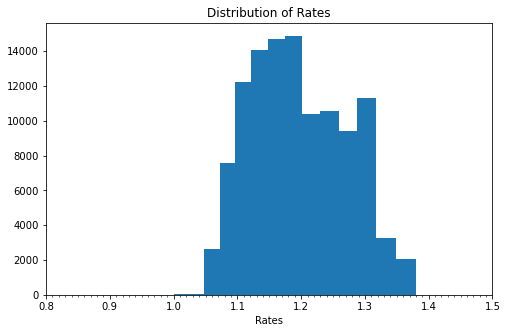

In [20]:
plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'BorrowerRateShifted', bins = bins)
plt.title('Distribution of Rates')
plt.xlabel('Rates')
plt.gca().set_xticks(np.arange(0.1, 1.5, 0.01), minor = True)
plt.xlim([0.8,1.5])
plt.show()

The data on rates appears to be normal and slighly skewed to the right.  A couple areas with of intrest are arouns the .25 and .32 and .35 outlier peaks.  A log 

Notice that the statistics has -inf for the value of min. This is because log10 of 0 is infinity. One way to correct this is by adding 1 to all `BorrowerRate` values as shown above.

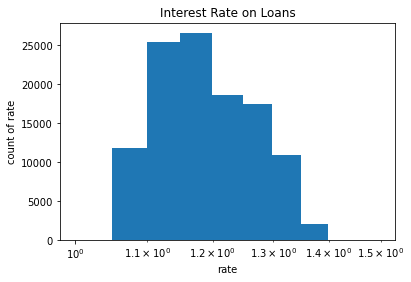

In [21]:
plt.hist(data = loans, x= 'BorrowerRateShifted')
plt.xscale('log')
plt.title('Interest Rate on Loans')
plt.xlabel('rate')
plt.ylabel('count of rate')
plt.show();

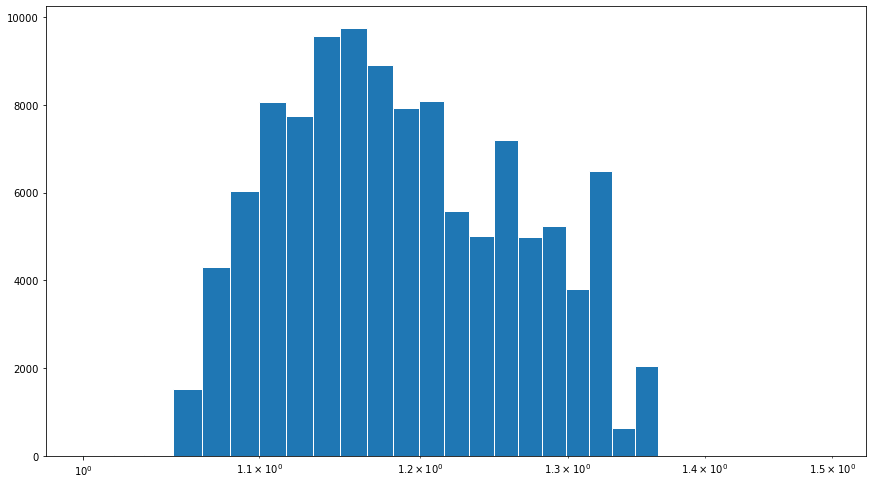

In [22]:
plt.figure(figsize=[14.70, 8.27])
n, bins, patches = plt.hist(data = loans, x  = 'BorrowerRateShifted',
                            bins = 30, edgecolor = "white")

# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')


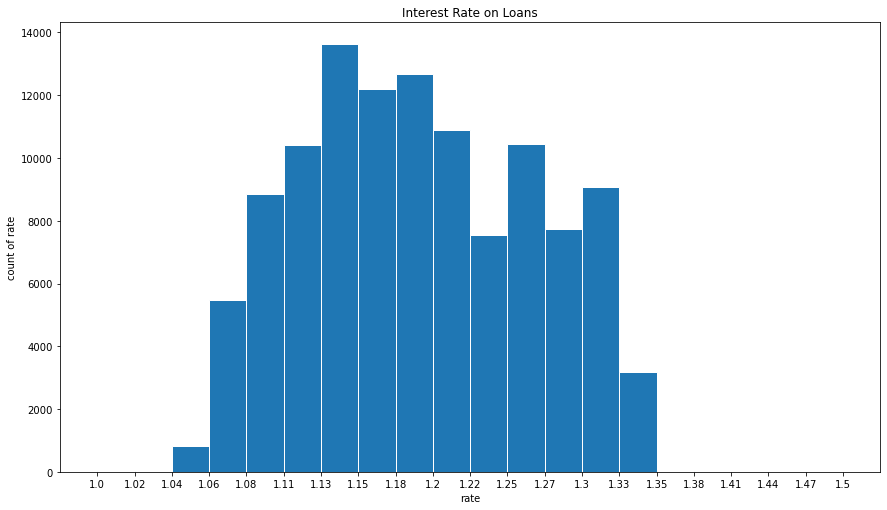

In [23]:
# Use the log10 values directly
loans["log10rate"] = np.log10(loans.BorrowerRateShifted)
# Instead, just set the number of bins (20 - 30, up to 50 if skewed)
# hist - edgecolor add borders to the bars (again, for ease of interpretation)
plt.figure(figsize=[14.70, 8.27])
n, bins, patches = plt.hist(data = loans, x  = 'log10rate',
                            bins = 20, edgecolor = "white")
# The bins are in log10, get original units
new_labels = [10**(x) for x in bins]
# round the labels (you can do this in the step above)
new_labels = [round(x,2) for x in new_labels]
# set the tick labels to be the same as the bins
plt.title('Interest Rate on Loans')
plt.xlabel('rate')
plt.ylabel('count of rate')
plt.xticks(bins,new_labels);


In [24]:
#alternate method
# set the bins based on the log10 distribution
## ... but ... change them back to original units (i.e.  10** )
bins = 10** (np.arange(0,np.log10(loans.BorrowerRateShifted.max()) + 0.01, 0.01))

# round them (to make the plot easier to interpret)
bins = [round(x,2) for x in bins]

In [25]:
print(bins)

[1.0, 1.02, 1.05, 1.07, 1.1, 1.12, 1.15, 1.17, 1.2, 1.23, 1.26, 1.29, 1.32, 1.35, 1.38, 1.41, 1.45, 1.48, 1.51]


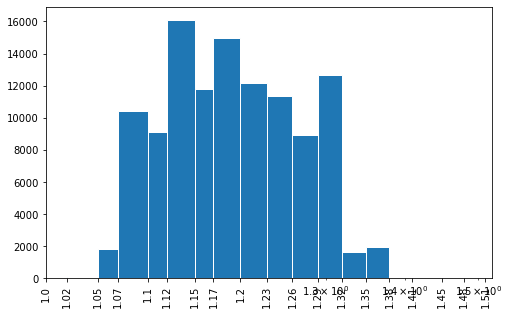

In [26]:
# hist - edgecolor add borders to the bars (again, for ease of interpretation)
plt.figure(figsize=[8,5])
n, bins, patches = plt.hist(data = loans, x  = 'BorrowerRateShifted',
                            bins = bins, edgecolor = "white")

plt.xlim([1,1.52])

plt.xscale('log')
# set the tick labels to be the same as the bins
plt.xticks(bins,bins)
plt.xticks(rotation=90);


Let's look at loan amount

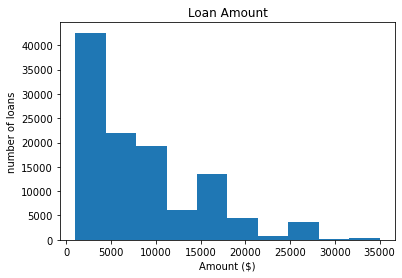

In [27]:
plt.hist(data = loans, x = 'LoanOriginalAmount', bins=10)
plt.title('Loan Amount')
plt.xlabel('Amount ($)')
plt.ylabel('number of loans')
plt.show()

The data on loan amount is highly skewed to the right and will require a log transform.  Half of loans issued were under 5,000 Usd.  The highest peaks are around 5k,10k, and 15k.

In [28]:
loans.LoanOriginalAmount.describe()

count    113066.000000
mean       8314.762307
std        6237.007841
min        1000.000000
25%        4000.000000
50%        6300.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

In [29]:
np.log10(loans.LoanOriginalAmount.describe())

count    5.053332
mean     3.919850
std      3.794976
min      3.000000
25%      3.602060
50%      3.799341
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

The log scale of loan amounts shows that the highest frequency (most common loan) is between $3,471 and $4,146.


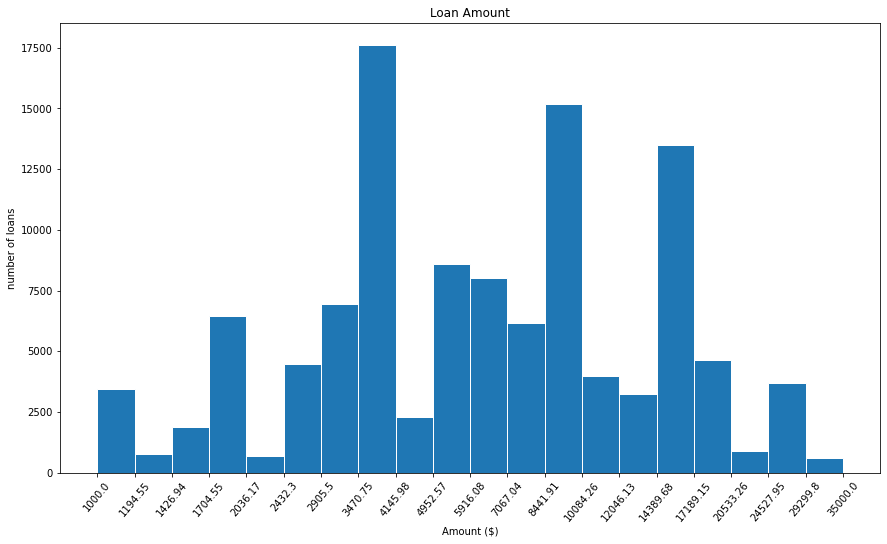

In [30]:
text = 'The log scale of loan amounts shows that the highest frequency (most common loan) is between $3,471 and $4,146.'
print(text)
# Use the log10 values directly
loans["log10amount"] = np.log10(loans.LoanOriginalAmount)
# Instead, just set the number of bins (20 - 30, up to 50 if skewed)
# hist - edgecolor add borders to the bars (again, for ease of interpretation)
plt.figure(figsize=[14.70, 8.27])
n, bins, patches = plt.hist(data = loans, x  = 'log10amount',
                            bins = 20, edgecolor = "white")
# The bins are in log10, get original units
new_labels = [10**(x) for x in bins]
# round the labels (you can do this in the step above)
new_labels = [round(x,2) for x in new_labels]
# set the tick labels to be the same as the bins
plt.title('Loan Amount')
plt.xlabel('Amount ($)')
plt.ylabel('number of loans')
plt.xticks(bins,new_labels)
plt.xticks(rotation=50);

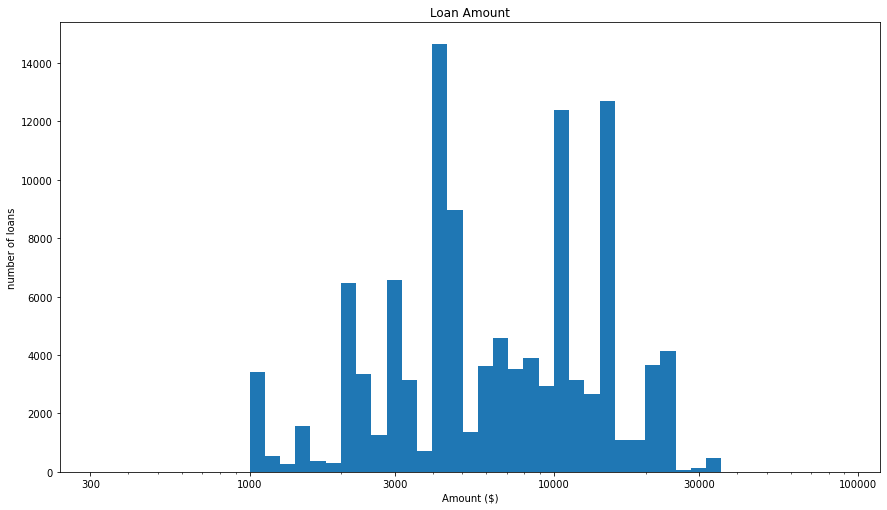

In [31]:
# axis transformation
plt.figure(figsize=[14.70, 8.27])
bins = 10 ** np.arange(2.5, 5, 0.05)
ticks = [300, 10**3, 3000, 10**4, 30000, 10**5]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data = loans, x= 'LoanOriginalAmount', bins = bins);
plt.title('Frequency of Diamond Prices ($, lognormal)');


# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')


# Apply x-ticks
plt.title('Loan Amount')
plt.xlabel('Amount ($)')
plt.ylabel('number of loans')
plt.xticks(ticks, labels);

Loan Amount using log scaling shows to be normal with a bimodal distribution.

In the case of loan amount, the small bin size proves very illuminating. There are very large spikes in frequency at the bars beginning with $3,471 - $4,146 which was noted in the chart above.  Then, there are big spikes in frequency at intervals of 5,000 all the way up to $35,000 loan amount.  Frequency quickly trails off until the next spike. These probably represent standard loan amounts


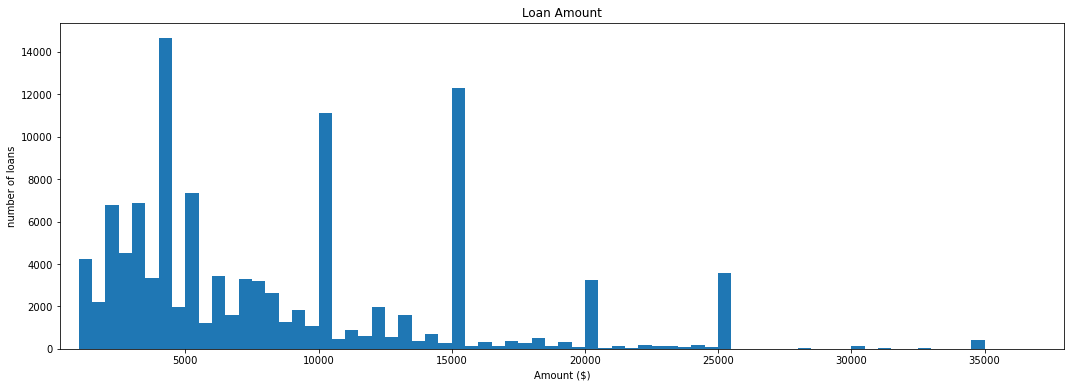

In [32]:
# univariate plot of loan amount
text = 'In the case of loan amount, the small bin size proves very illuminating. There are very large spikes in frequency at the bars beginning with $3,471 - $4,146 which was noted in the chart above.  Then, there are big spikes in frequency at intervals of 5,000 all the way up to $35,000 loan amount.  Frequency quickly trails off until the next spike. These probably represent standard loan amounts'
print(text)

binsize=500
bins = np.arange(0, loans['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=(18,6))
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bins)
plt.xlim([300,38000])
plt.title('Loan Amount')
plt.xlabel('Amount ($)')
plt.ylabel('number of loans')
plt.show()

In [33]:
loans.DebtToIncomeRatio.describe()

count    104594.000000
mean          0.276032
std           0.553738
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

(0.0, 2.0)

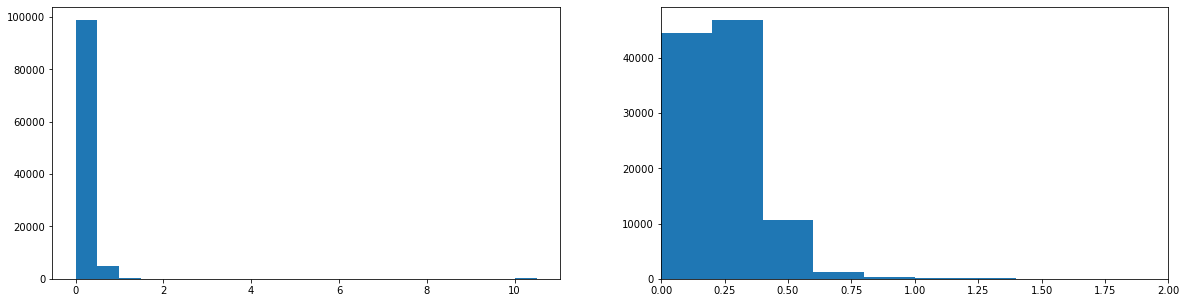

In [34]:
# Define the figure size
plt.figure(figsize = [20, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loans['DebtToIncomeRatio'].max()+0.5, 0.5)
plt.hist(data=loans, x='DebtToIncomeRatio', bins = bin_edges)

# histogram on right: focus in on bulk of data < 2
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, loans['DebtToIncomeRatio'].max()+0.2, 0.2)
plt.hist(data=loans, x='DebtToIncomeRatio', bins = bin_edges)
plt.xlim(0, 2) # could also be called as plt.xlim((0, 2))

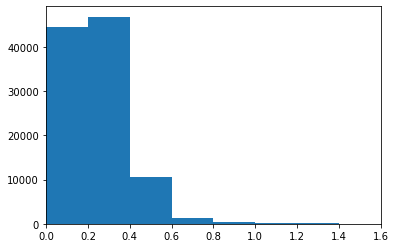

In [35]:
bins = np.arange(0, loans['DebtToIncomeRatio'].max()+0.2, 0.2)
plt.hist(data=loans, x='DebtToIncomeRatio', bins=bins);

# Set the upper and lower bounds of the bins that are displayed in the plot
# Refer here for more information - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html
# The argument represent a tuple of the new x-axis limits.
plt.xlim((0,1.6));

Most borrowers (75%) had a D/E ratio of less than .32 with almost all of the borrowers having a ratio of less than .6

In [36]:
loans['EmploymentStatus'].value_counts()

Employed         66598
Full-time        26354
Self-employed     6052
Not available     5347
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

<AxesSubplot:>

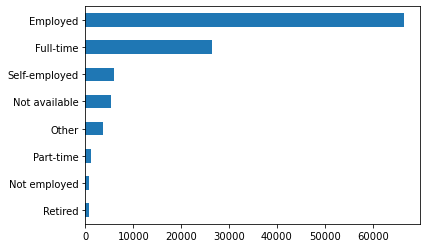

In [37]:
loans['EmploymentStatus'].value_counts()[8::-1].plot(kind='barh') #start at item 8 in list, and reverse list

Operations used.  1. Negative index- You can index lists or series in two directions, forwards or backwards
A negative index starts at the end and works backwards. And 2) Reverse Order
To reverse the order of a list, you use [::-1]

Most borrowers are employed.

In [38]:
listing_counts = loans['ListingCategory (numeric)'].value_counts()
listing_counts

1     57624
0     16965
7     10448
2      7388
3      7157
6      2568
4      2395
13     1987
15     1507
18      882
14      863
19      764
20      762
5       756
16      304
11      214
8       196
10       91
9        85
12       58
17       52
Name: ListingCategory (numeric), dtype: int64

In [39]:
listing_order = listing_counts.index
listing_order

Int64Index([1, 0, 7, 2, 3, 6, 4, 13, 15, 18, 14, 19, 20, 5, 16, 11, 8, 10, 9,
            12, 17],
           dtype='int64')

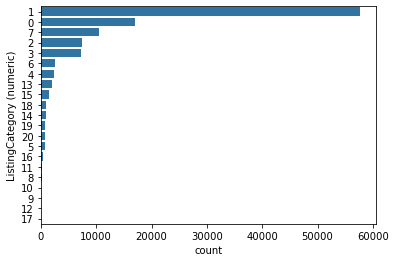

In [40]:
base_color = sb.color_palette()[0]
sb.countplot(data=loans, y='ListingCategory (numeric)', color=base_color,order=listing_order);

The majority of loans were used for debt consolidation.  

In [41]:
loans['ProsperRating (Alpha)'].value_counts()

C     18096
B     15368
A     14390
D     14170
E      9716
HR     6917
AA     5325
Name: ProsperRating (Alpha), dtype: int64

In [42]:
loan_rating = ['HR', 'E', 'D', 'C', 'B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = loan_rating)
loans['ProsperRating (Alpha)'] = loans['ProsperRating (Alpha)'].astype(ordered_var)

In [43]:
loans['ProsperRating (Alpha)'].unique()

[NaN, A, D, B, E, C, AA, HR]
Categories (7, object): [HR < E < D < C < B < A < AA]

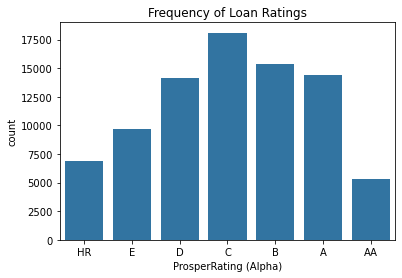

In [44]:
sb.countplot(data = loans, x = 'ProsperRating (Alpha)', color = base_color);
plt.title('Frequency of Loan Ratings');

Distribution of loans based on ProsperRating shows that most loans were rated E through A. 

In [45]:
loans['CreditGrade'].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [46]:
credit_rating= ['NC','HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = credit_rating)
loans['CreditGrade'] = loans['CreditGrade'].astype(ordered_var)

Text(0.5, 1.0, 'Credit Grade Frequency')

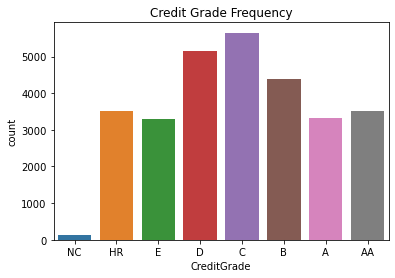

In [47]:
# univariate plot for CreditGrade
sb.countplot(data = loans, x = 'CreditGrade')
loans['CreditGrade'].value_counts()
plt.title('Credit Grade Frequency')

In [48]:
loans.IncomeRange.value_counts()

$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
Not displayed      7741
$1-24,999          7241
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [49]:
borrower_income = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999', '$50,000-74,999','$75,000-99,999','$100,000+']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = borrower_income)
loans['IncomeRange'] = loans['IncomeRange'].astype(ordered_var)

In [50]:
loans.IncomeRange.value_counts()

$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
Not displayed      7741
$1-24,999          7241
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

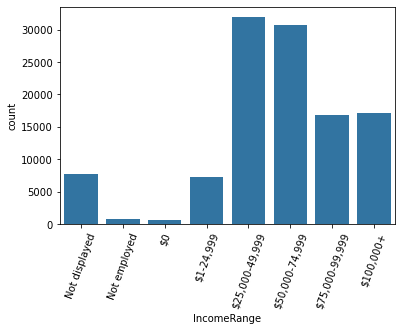

In [51]:
#income range of borrowers
base_color = sb.color_palette()[0]
sb.countplot(data=loans, x='IncomeRange', color = base_color)
plt.xticks(rotation=70);

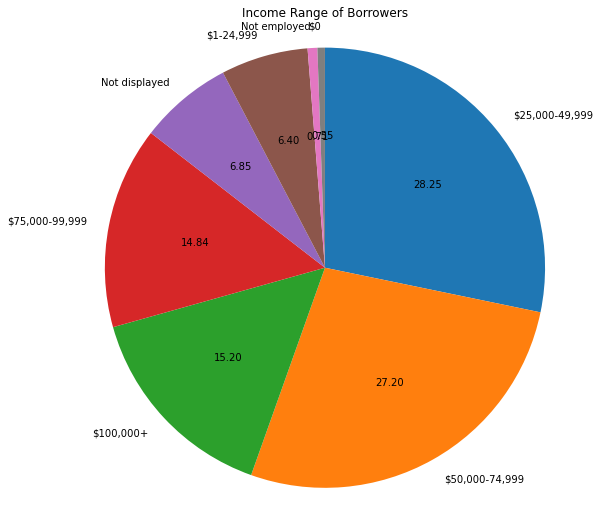

In [52]:
plt.figure(figsize = [12, 9])

sorted_counts = loans['IncomeRange'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%.2f',
        counterclock = False);
plt.axis('square')
plt.title('Income Range of Borrowers')
plt.show()

Over half of borrowers have incomes over 25,000 Usd.

In [53]:
loans['StatedMonthlyIncome'].value_counts()

4166.666667    3486
5000.000000    3367
3333.333333    2889
3750.000000    2399
5416.666667    2351
               ... 
5804.500000       1
8170.666667       1
3512.000000       1
5721.583333       1
3843.500000       1
Name: StatedMonthlyIncome, Length: 13502, dtype: int64

Text(0.5, 1.0, 'The Most Common Monthly Incomes')

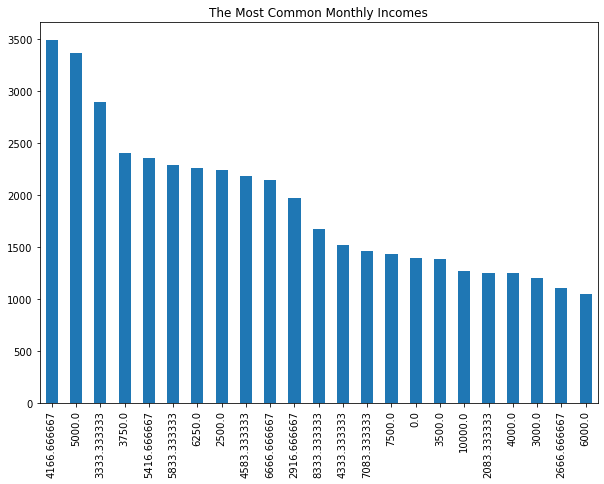

In [54]:
plt.figure(figsize = [10, 7])
top=loans.groupby('StatedMonthlyIncome').filter(lambda x: len(x) >= 1000) #1,000 (4 spaces) count minimum filter applied
top['StatedMonthlyIncome'].value_counts().plot(kind = 'bar')
plt.title('The Most Common Monthly Incomes')

In [55]:
top['StatedMonthlyIncome']

2         2083.333333
5         8333.333333
6         2083.333333
8         3333.333333
10        7500.000000
             ...     
113926    5416.666667
113929    4333.333333
113930    6250.000000
113932    4333.333333
113936    4583.333333
Name: StatedMonthlyIncome, Length: 43538, dtype: float64

the most common monthly incomes are between 4,000 and 6,000 Usd.

In [56]:
loans.StatedMonthlyIncome.describe()

count    1.130660e+05
mean     5.605120e+03
std      7.495596e+03
min      0.000000e+00
25%      3.199396e+03
50%      4.666667e+03
75%      6.824688e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [57]:
# convert from scientific notation
pd.set_option('float_format', '{:f}'.format)

In [58]:
loans.StatedMonthlyIncome.describe()

count    113066.000000
mean       5605.119580
std        7495.595563
min           0.000000
25%        3199.395833
50%        4666.666667
75%        6824.687500
max     1750002.916667
Name: StatedMonthlyIncome, dtype: float64

In [59]:
bins = np.arange(0, loans['StatedMonthlyIncome'].max()+1000, 1000)
bins

array([0.000e+00, 1.000e+03, 2.000e+03, ..., 1.749e+06, 1.750e+06,
       1.751e+06])

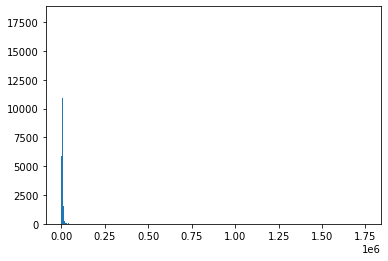

In [60]:
plt.hist(data=loans, x='StatedMonthlyIncome', bins=bins);

There appears to be huge outliers in the Stated Monthly Income Column.  1st attempt at histogram fails.  Lets set the upper bound to exclude the 1%.

In [61]:
#create intervals of .01 from 0 to 1
np.arange(0,1+.01,.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [62]:
loans.StatedMonthlyIncome.describe(np.arange(0,1+.01,.01))

count    113066.000000
mean       5605.119580
std        7495.595563
min           0.000000
0%            0.000000
             ...      
97%       14194.400000
98%       16333.333333
99%       20500.000000
100%    1750002.916667
max     1750002.916667
Name: StatedMonthlyIncome, Length: 106, dtype: float64

In [63]:
loans.StatedMonthlyIncome.describe(np.arange(0,1+.01,.01)).tail(20)

82%       7875.625000
83%       8000.000000
84%       8299.500000
85%       8333.333333
86%       8500.000000
87%       8750.000000
88%       9166.666667
89%       9333.333333
90%       9750.000000
91%      10000.000000
92%      10416.666667
93%      10833.333333
94%      11500.000000
95%      12250.000000
96%      12916.666667
97%      14194.400000
98%      16333.333333
99%      20500.000000
100%   1750002.916667
max    1750002.916667
Name: StatedMonthlyIncome, dtype: float64

The 99 percentile is a little more than 20,000, and the max is 1.75 million.  Huge outlier that needs to be removed

In [64]:
bins = np.arange(0, loans['StatedMonthlyIncome'].quantile(.99).max()+1000, 1000)
bins

array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
        8000.,  9000., 10000., 11000., 12000., 13000., 14000., 15000.,
       16000., 17000., 18000., 19000., 20000., 21000.])

Plot excluding the 1% below

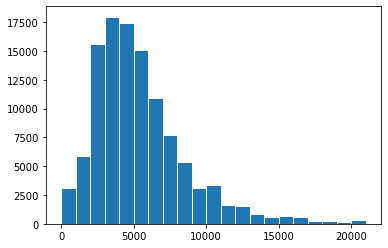

In [65]:
plt.hist(data=loans, x='StatedMonthlyIncome', bins=bins, edgecolor="white");


2nd attempt successful.  Edgecolor adds borders to the bars.

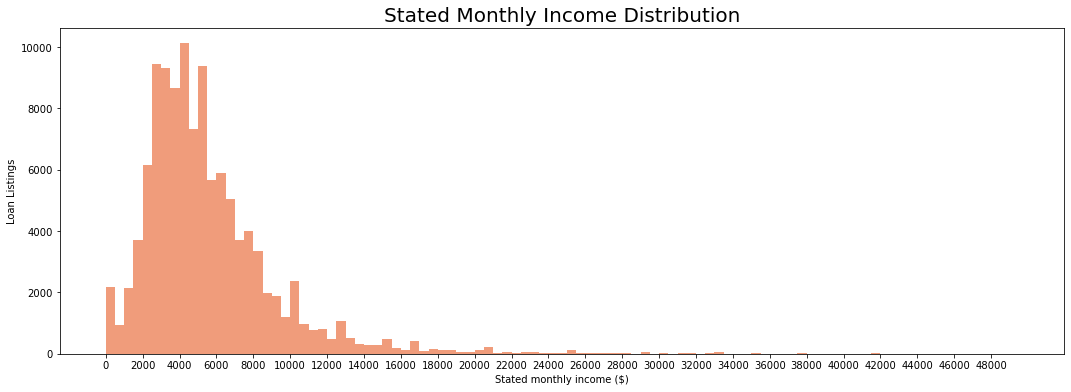

In [66]:
#alternate method
base_color = sb.color_palette('RdBu')[1]
bins = np.arange(0, 50000, 500)
plt.figure(figsize=(18,6))
plt.hist(data = loans, x ='StatedMonthlyIncome', color=base_color, bins=bins);
#plt.xticks(0, 50000, 1000) doesnt work causes overlap
plt.xticks(np.arange(0, 50000, step=2000)) # using step 1000 causes overlap in ticks.  step 2000 works
plt.title('Stated Monthly Income Distribution',fontsize=20);
plt.xlabel('Stated monthly income ($)');
plt.ylabel("Loan Listings");
 

In [67]:
#convert df back to original notation
pd.reset_option('all')


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



C:\Users\Yaron\anaconda3\lib\site-packages\pandas\_config\config.py:620: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

To visualize 2 numeric variables, scatter plot is a good option

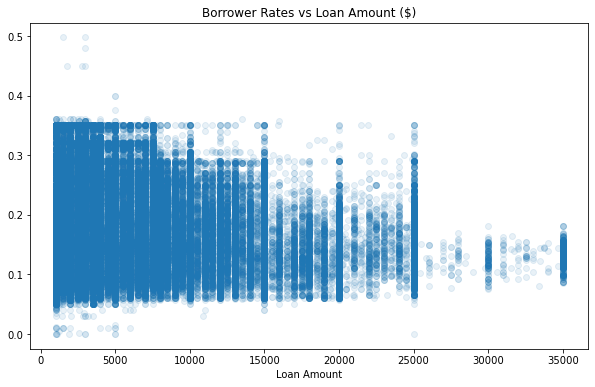

In [68]:
# rates vs loan amount
plt.figure(figsize = (10,6))
plt.scatter(data = loans, x = 'LoanOriginalAmount', y = 'BorrowerRate', alpha = 0.1)


plt.title('Borrower Rates vs Loan Amount ($)')
plt.xlabel('Loan Amount');

Interest rates for the lower loan amounts tend have a wider range than the rates on Loan Amounts at the higher end.  The highest loan amounts have some of the lowest interest rates.  

In [69]:
loans.LoanOriginalAmount.describe()

count    113066.000000
mean       8314.762307
std        6237.007841
min        1000.000000
25%        4000.000000
50%        6300.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

In [70]:
loans.BorrowerRate.describe()

count    113066.000000
mean          0.192946
std           0.074917
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250600
max           0.497500
Name: BorrowerRate, dtype: float64

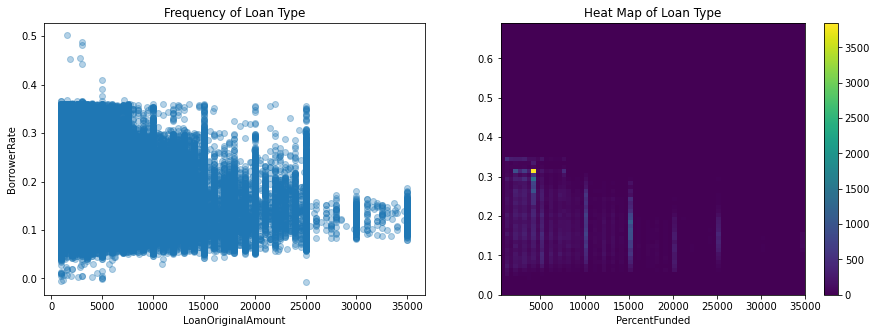

In [71]:
# biivariate plot between BorrowRate and PercentFunded
#What is the proportion of loan type based on interest rate and borrow rate?
plt.figure(figsize = [15, 5])


bins_x = np.arange(500, 35000+500, 500)
bins_y = np.arange(0.0, 0.6+.1, .01)

plt.subplot(1, 2, 1)
sb.regplot(data = loans, x='LoanOriginalAmount', y = 'BorrowerRate', fit_reg = False, x_jitter = 0.2, y_jitter = 0.01, scatter_kws = {'alpha' : 1/3})
plt.title('Frequency of Loan Type')

plt.subplot(1, 2, 2)
plt.hist2d(data = loans, x='LoanOriginalAmount', y = 'BorrowerRate',bins = [bins_x,bins_y])
plt.title('Heat Map of Loan Type')
plt.xlabel('PercentFunded')
plt.colorbar();

The most common loan is 5k  at an interest rate of about 0.32.  There also seems to be many loans at $15k with and interest rate of 0.2.

To start off with, I want to look at the pairwise correlations present between features in the data.

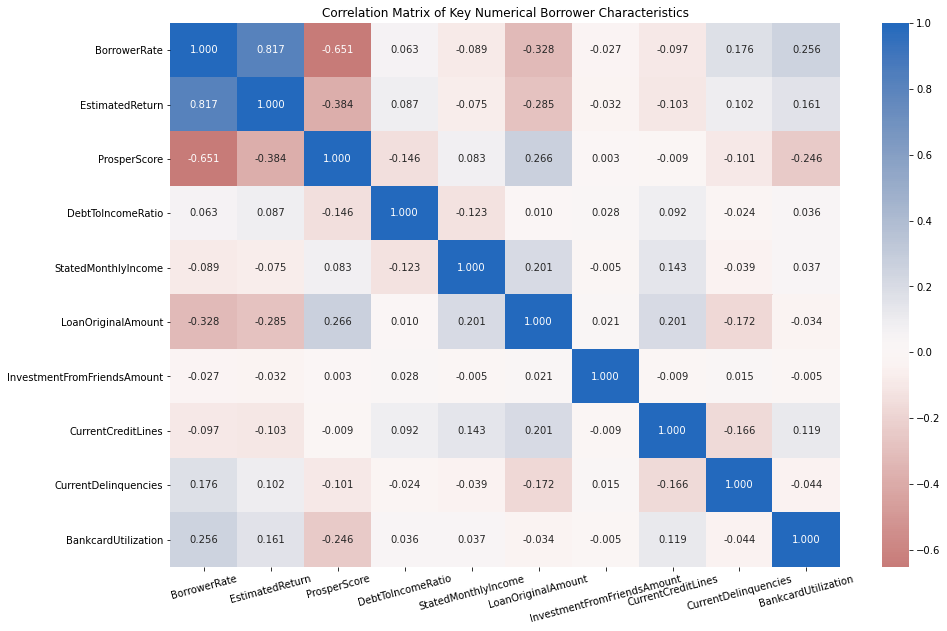

In [72]:
numeric_vars = ['BorrowerRate', 'EstimatedReturn', 'ProsperScore', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'InvestmentFromFriendsAmount','CurrentCreditLines','CurrentDelinquencies','BankcardUtilization']
plt.figure(figsize = [15, 10])
ax = plt.axes()
sb.heatmap(loans[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0, ax = ax)
plt.xticks(rotation = 15)
ax.set_title('Correlation Matrix of Key Numerical Borrower Characteristics')
plt.show()

Interest rate is most correlated with estimated return, Prosper Score, and Loan Original Amount.

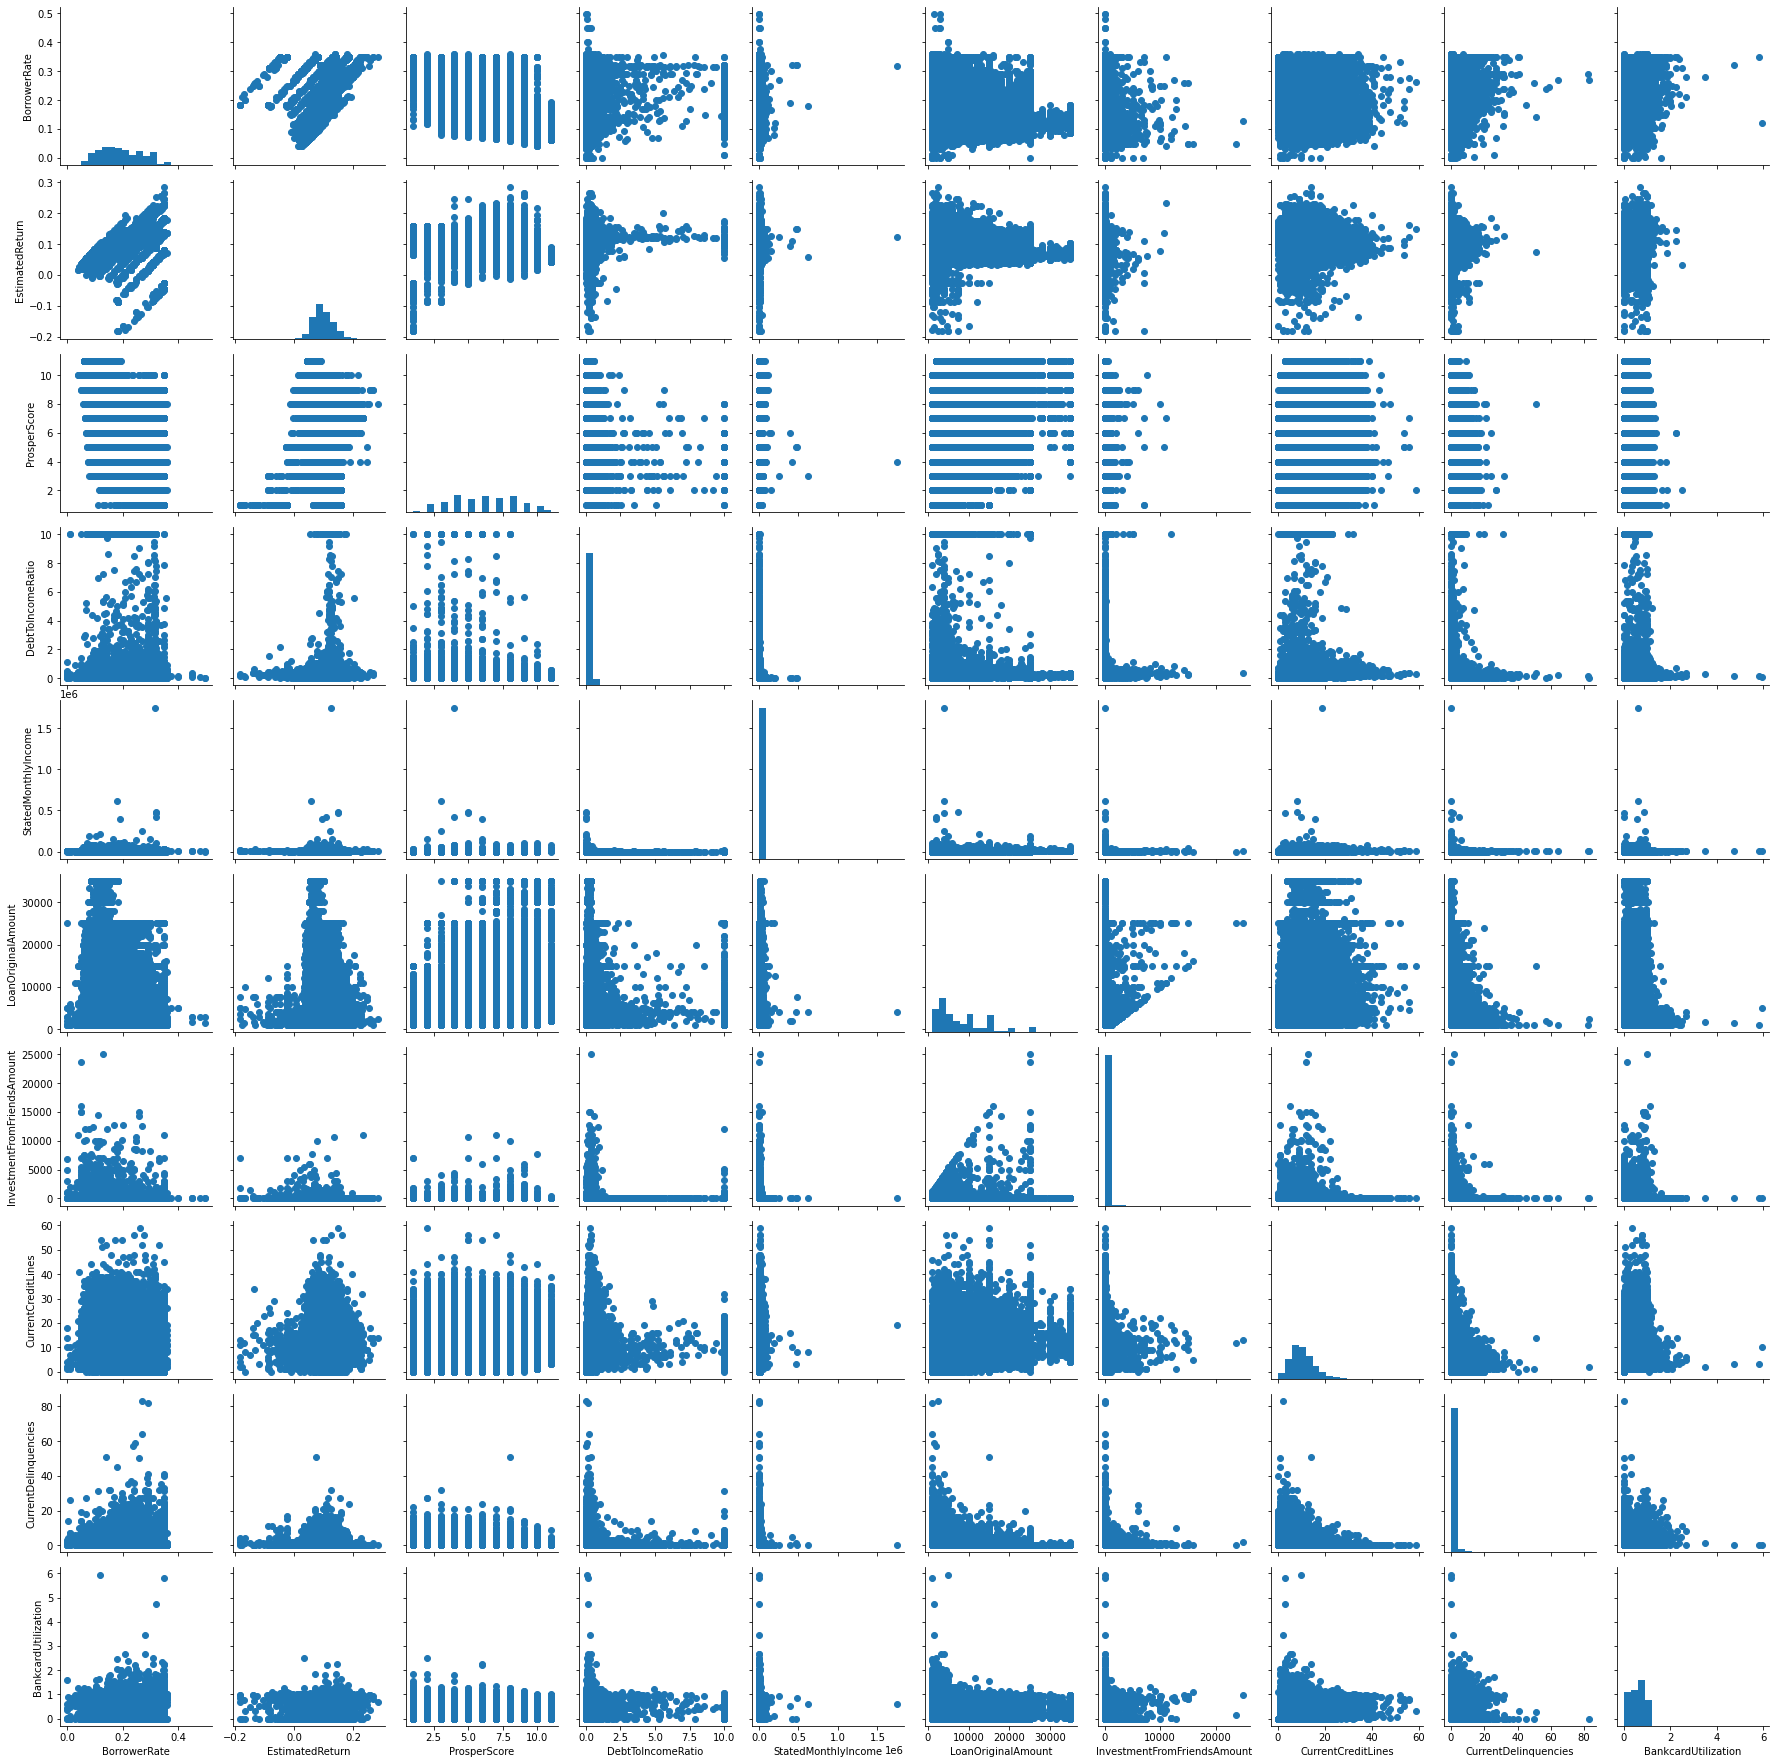

In [73]:
# plot matrix: sample 500 loans so that plots are clearer and
# they render faster

samples = np.random.choice(loans.shape[0], 500, replace = False)
loans_samp = loans.reindex(samples) #line 2 change: previous attempt with loc produced reindex error

g = sb.PairGrid(data = loans, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

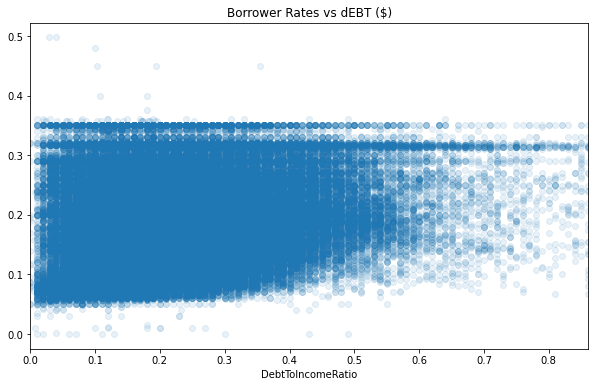

In [74]:
plt.figure(figsize = (10,6))
plt.scatter(data = loans, x = 'DebtToIncomeRatio', y = 'BorrowerRate', alpha = 0.1)
plt.xlim(0, loans.DebtToIncomeRatio.quantile(0.99))
plt.title('Borrower Rates vs dEBT ($)')
plt.xlabel('DebtToIncomeRatio');

<AxesSubplot:xlabel='DebtToIncomeRatio', ylabel='BorrowerRate'>

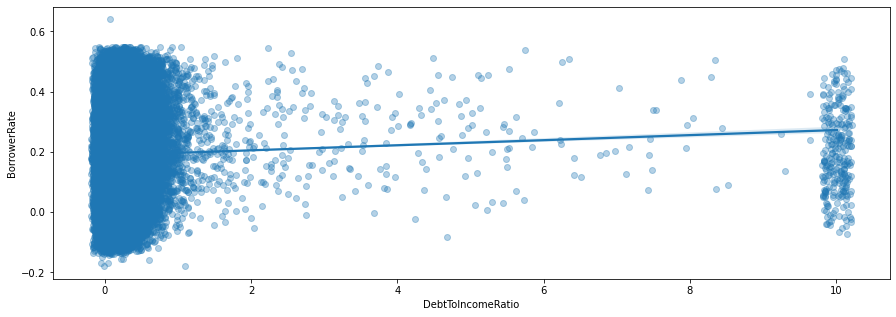

In [75]:
#change this chart
# biivariate plot between DebtToIncomeRatio and BorrowerRate
# Is there a trend between a borrower's debt:income ratio and interest rate they get?

plt.figure(figsize = [15, 5])
sb.regplot(data = loans, x = 'DebtToIncomeRatio', y = 'BorrowerRate', x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3}) 
         

Text(0.5, 1.0, 'Relationship between Interest Rate and Estimated Return of Loan')

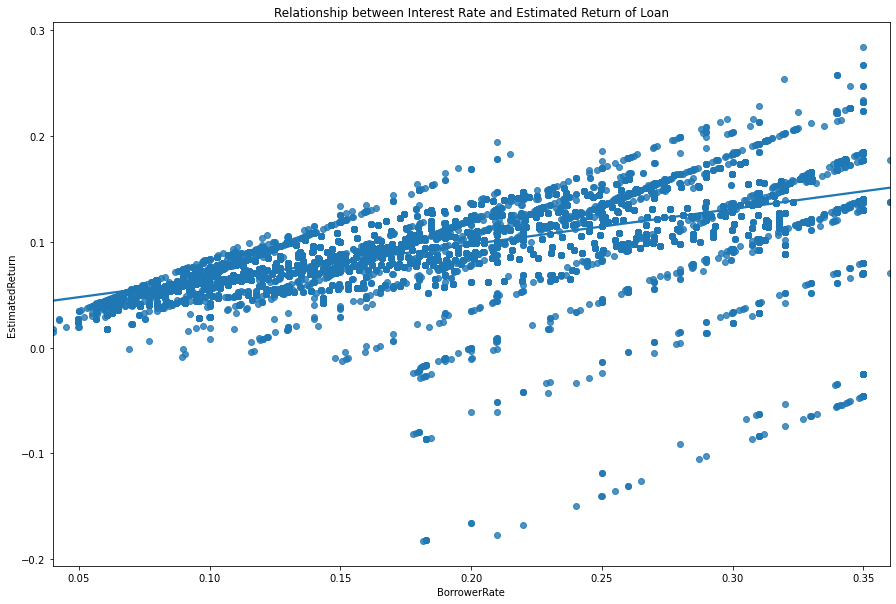

In [76]:
 # biivariate plot between BorrowerRate and EstimatedReturn 
plt.figure(figsize = [15, 10])
sb.regplot(data = loans, x = 'BorrowerRate', y = 'EstimatedReturn')
plt.title('Relationship between Interest Rate and Estimated Return of Loan')

Most losses to the lender occurred with higher interest rate loans

1 numeric versus 1 categorical variable can be best illustrated by violin, box or barplot

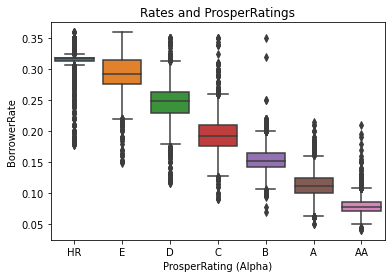

In [77]:
df = sb.boxplot(x="ProsperRating (Alpha)", y="BorrowerRate", data=loans)
plt.title('Rates and ProsperRatings');

Rates drop as rating increases

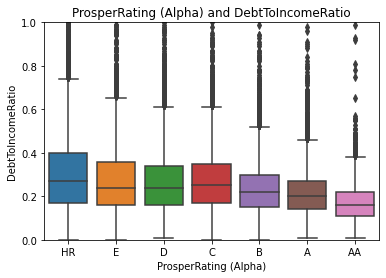

In [78]:
df = sb.boxplot(x="ProsperRating (Alpha)",y="DebtToIncomeRatio",data=loans)
plt.ylim(0, 1) 
plt.title('ProsperRating (Alpha) and DebtToIncomeRatio');

Debt/Income has an inverse effect on ProsperRating

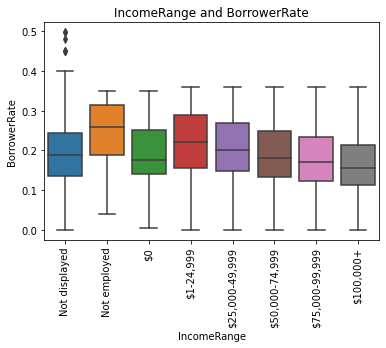

In [79]:
df = sb.boxplot(x="IncomeRange", y="BorrowerRate",data=loans)
plt.xticks(rotation=90)
plt.title('IncomeRange and BorrowerRate');

Higher Income Range results in lower average Borrower Rate.

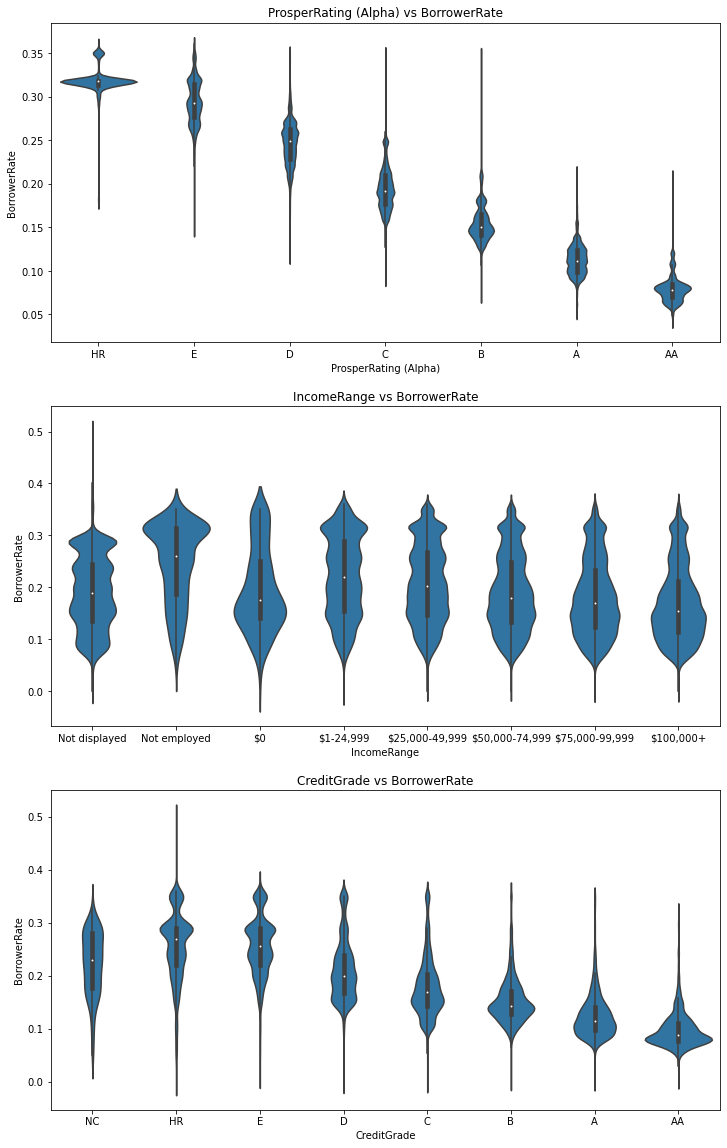

In [80]:
plt.figure(figsize=(12,20))
base_color = sb.color_palette()[0]

# price vs cut
plt.subplot(3,1,1)
sb.violinplot(data=loans, x = "ProsperRating (Alpha)", y="BorrowerRate", color = base_color)
plt.title('ProsperRating (Alpha) vs BorrowerRate')


# price vs color
plt.subplot(3,1,2)
sb.violinplot(data=loans, x = "IncomeRange", y="BorrowerRate", color = base_color)
plt.title('IncomeRange vs BorrowerRate')



# price vs clarity
plt.subplot(3,1,3)
sb.violinplot(data=loans, x = 'CreditGrade', y = 'BorrowerRate', color = base_color)
plt.title('CreditGrade vs BorrowerRate')
plt.show();



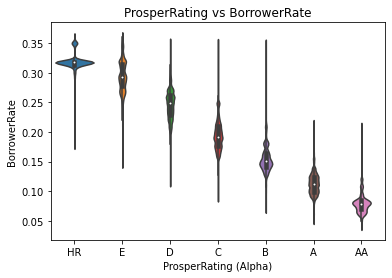

In [81]:
sb.violinplot(x="ProsperRating (Alpha)", y="BorrowerRate", data=loans)
plt.title('ProsperRating vs BorrowerRate')
plt.show()

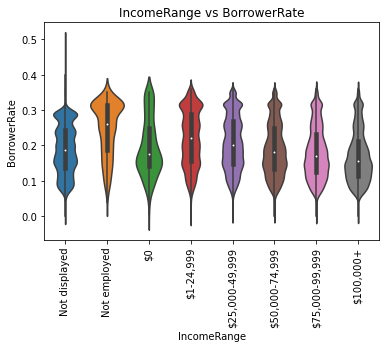

In [82]:
sb.violinplot(x="IncomeRange", y="BorrowerRate", data=loans)
plt.title('IncomeRange vs BorrowerRate')
plt.xticks(rotation=90);
plt.show()

Higher Income Range results in lower average borrower rates.

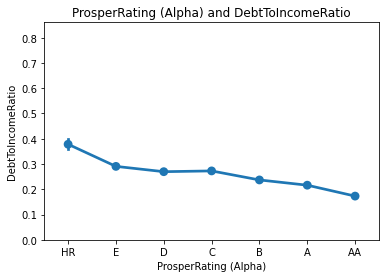

In [83]:
df = sb.pointplot(x="ProsperRating (Alpha)", y="DebtToIncomeRatio", data=loans)  

plt.ylim(0, loans.DebtToIncomeRatio.quantile(0.99))  #use 99 percent of the data in column to remove outliers 
plt.title('ProsperRating (Alpha) and DebtToIncomeRatio');

lower D/E ratio results in higher rating

<AxesSubplot:xlabel='CreditGrade', ylabel='count'>

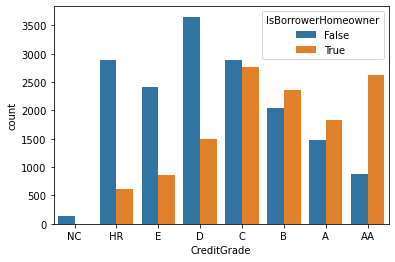

In [84]:
# biivariate plot between IsBorrowerHomeOwner and CreditGrade
#Is it a trend between being a homeowner and the type of credit grade you have?

sb.countplot(data = loans, x = 'CreditGrade', hue = 'IsBorrowerHomeowner')

<AxesSubplot:xlabel='ProsperRating (Alpha)', ylabel='count'>

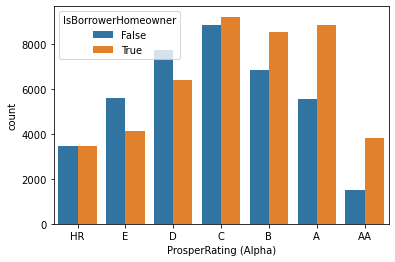

In [85]:
# biivariate plot between IsBorrowerHomeOwner and CreditGrade
#Is it a trend between being a homeowner and the type of credit grade you have?

sb.countplot(data = loans, x = 'ProsperRating (Alpha)', hue = 'IsBorrowerHomeowner')

The majority of credit worth borrowers (C grade or higher) are homeowners.

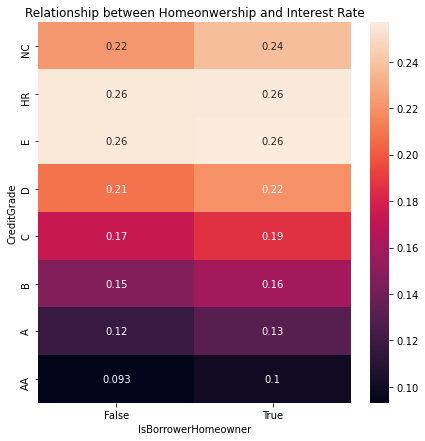

In [86]:
# biivariate plot between IsBorrowerHomeOwner and CreditGrade and Interest Rate
#Is there an affect of borrower being a homeowner on interest rate across credit grade groups?

plt.figure(figsize = [7,7])
homeowner_counts = loans.groupby(['CreditGrade','IsBorrowerHomeowner']).mean()
borrowerrate_counts = homeowner_counts['BorrowerRate']
borrowerrate_counts = borrowerrate_counts.reset_index(name = 'count')
borrowerrate_counts = borrowerrate_counts.pivot(index = 'CreditGrade', columns = 'IsBorrowerHomeowner', values = 'count')
sb.heatmap(borrowerrate_counts, annot = True)
plt.title('Relationship between Homeonwership and Interest Rate');

Being a homeowner doesnt have much of an affect on interest rate across credit grades 

In [87]:
homeowner_counts

ListingNumber  Term  BorrowerAPR  \
CreditGrade IsBorrowerHomeowner                                     
NC          False                 50532.964286  36.0     0.234943   
            True                   9849.000000  36.0     0.245020   
HR          False                149125.627336  36.0     0.271200   
            True                 153979.870550  36.0     0.271546   
E           False                157030.870248  36.0     0.270266   
            True                 164007.927503  36.0     0.271954   
D           False                203152.066265  36.0     0.222491   
            True                 201689.743504  36.0     0.232909   
C           False                213919.484072  36.0     0.187156   
            True                 218898.847881  36.0     0.200038   
B           False                220393.561335  36.0     0.157396   
            True                 230114.589111  36.0     0.170349   
A           False                213767.457684  36.0     0.128783   
            True                 230463.303047  36.0     0.141253   
AA          False                194794.500566  36.0     0.101758   
            True                 230405.454303  36.0     0.107654   

                                 BorrowerRate  LenderYield  \
CreditGrade IsBorrowerHomeowner                              
NC          False                    0.222251     0.208609   
            True                     0.237500     0.220000   
HR          False                    0.255440     0.242594   
            True                     0.255830     0.241938   
E           False                    0.255335     0.243084   
            True                     0.256930     0.244637   
D           False                    0.208718     0.198028   
            True                     0.219693     0.208704   
C           False                    0.173181     0.162725   
            True                     0.186460     0.175689   
B           False                    0.146581     0.136384   
            True                     0.159625     0.149157   
A           False                    0.118042     0.109984   
            True                     0.130736     0.122331   
AA          False                    0.093180     0.087475   
            True                     0.099705     0.093957   

                                 EstimatedEffectiveYield  EstimatedLoss  \
CreditGrade IsBorrowerHomeowner                                           
NC          False                                    NaN            NaN   
            True                                     NaN            NaN   
HR          False                                    NaN            NaN   
            True                                     NaN            NaN   
E           False                                    NaN            NaN   
            True                                     NaN            NaN   
D           False                                    NaN            NaN   
            True                                     NaN            NaN   
C           False                                    NaN            NaN   
            True                                     NaN            NaN   
B           False                                    NaN            NaN   
            True                                     NaN            NaN   
A           False                                    NaN            NaN   
            True                                     NaN            NaN   
AA          False                                    NaN            NaN   
            True                                     NaN            NaN   

                                 EstimatedReturn  ProsperRating (numeric)  \
CreditGrade IsBorrowerHomeowner                                             
NC          False                            NaN                      NaN   
            True                             NaN                      NaN   
HR          Fa

In [88]:
borrowerrate_counts

IsBorrowerHomeowner,False,True
CreditGrade,,
NC,0.222251,0.237500
HR,0.255440,0.255830
E,0.255335,0.256930
D,0.208718,0.219693
C,0.173181,0.186460
B,0.146581,0.159625
A,0.118042,0.130736
AA,0.093180,0.099705


Text(0.5, 0.98, 'Relationship between Income Range and Interest Rate')

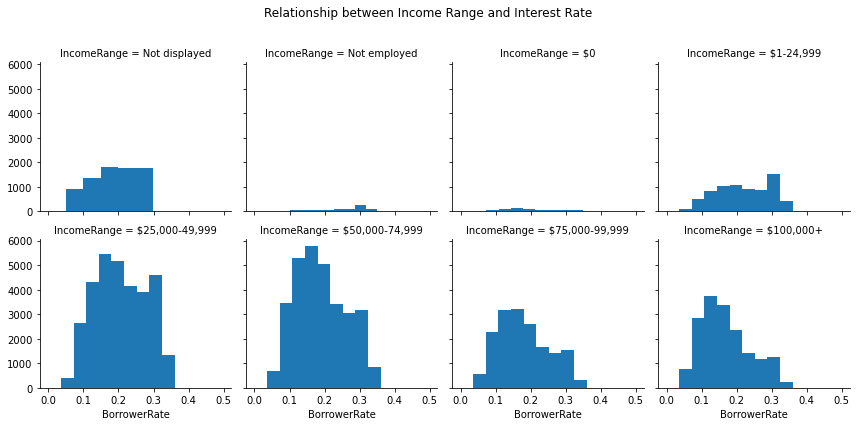

In [89]:
#bivariate plot between BorrowerRate across IncomeRanges
#Does income bracket affect the frequency of levels of interest rates?

g = sb.FacetGrid(data = loans, col = 'IncomeRange', col_wrap = 4)
g.map(plt.hist, 'BorrowerRate')
plt.subplots_adjust(top=.85)
g.fig.suptitle('Relationship between Income Range and Interest Rate')

A trend is visible in the Facetgrid above in that loans where the borrower is making less than $\$$25,000 a year tend to have higher interest rates than those making above that amount.  The most common frequency rates for borrowers making above $\$$25,000 is less than 0.2, while the most common interest rate for those making less than $\$$25,000 is 0.3 and higher.

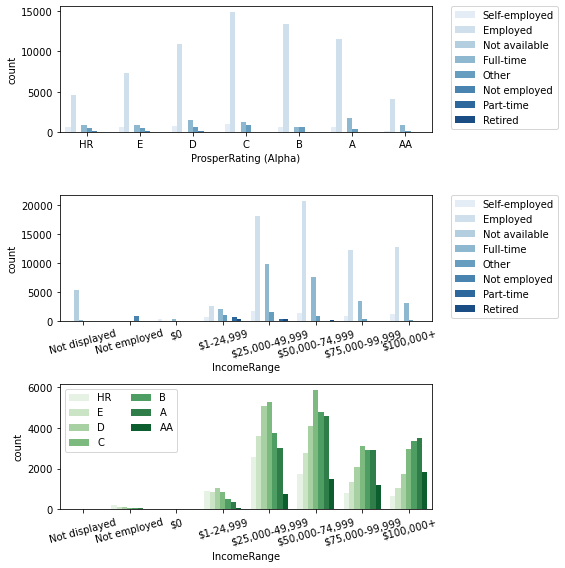

In [90]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = loans, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = 'Blues')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # re-arrange legend to reduce overlapping

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loans, x = 'IncomeRange', hue = 'EmploymentStatus', palette = 'Blues')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 15)

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loans, x = 'IncomeRange', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 2, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 15)

plt.tight_layout()
plt.show()

Employment status and income range have a modest affect on borrower rating.  There is just about the same number of borrowers making 100k with AA rating as there are making 50k and AA rating.  Almost all borrowers have some type of employment.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

C:\Users\Yaron\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1080x1080 with 0 Axes>

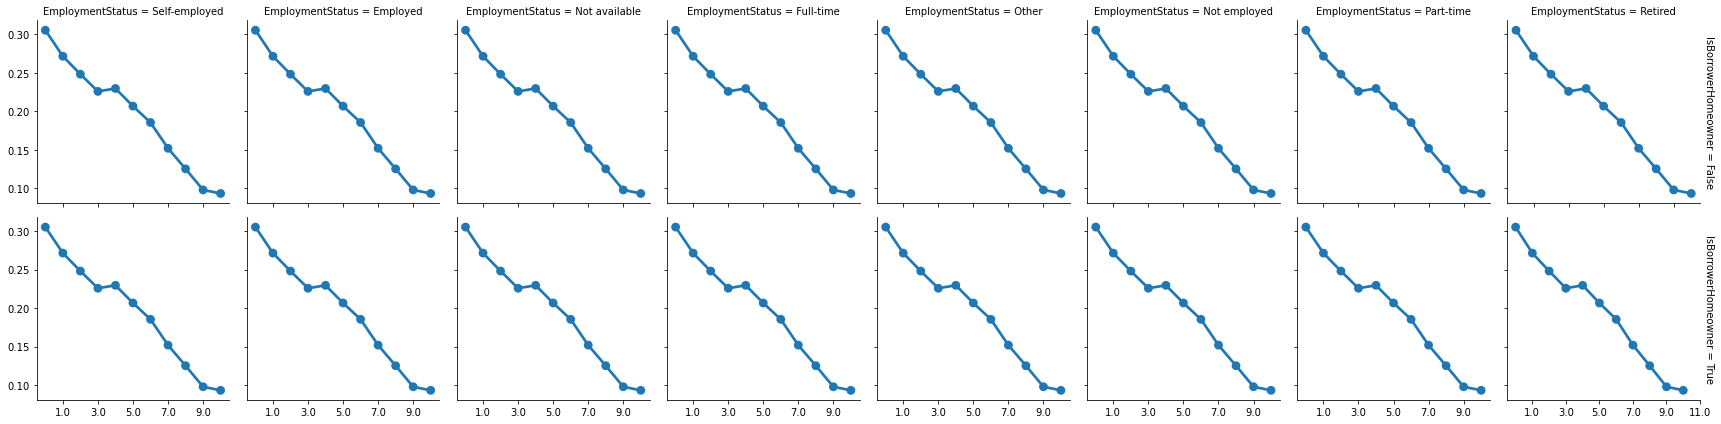

In [91]:
# multivariate plot between EmploymentStatus, ProsperScore, IsBorrowerHomeowner and BorrowerRate 
#Does home ownership and employment status have a significant affect on interest rate
plt.figure(figsize = [15, 15])
bins_x = np.arange(1, 10+1, 2)
bins_y = np.arange(0.0, 0.5+.1, .01)
g = sb.FacetGrid(data = loans, col = 'EmploymentStatus', row = 'IsBorrowerHomeowner', height = 3,
                margin_titles = True)
g.map(sb.pointplot, data = loans, x = 'ProsperScore', y ='BorrowerRate', bins = [bins_x,bins_y])
ticks = [1,3,5,7,9,11]
plt.xticks(ticks, [float(x) for x in ticks]);

When comparing the columns with each other, the Borrowers rate is about the same across employment categories, with those that have lower ProsperScores having higher interest rates. Similarly, being a homeowner doesn't really have much of an impact on borrower rate. As you can see when you compare rows, the interest rate is about the same betweeen populations that are homeowners versus not homeowners.

C:\Users\Yaron\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Below $15,000, loans are given out across Prosper Rating and loan amount.  Loans above $15,000 are primarily given to borrowers with C rating or higher.  Loans above $25,000 are mostly for borrowers with B rating or higher.  One interesting obesrvation is that the interest rate for B and A grade borrowers actually declines as loan amount increases, while the rate for highest rated AA loans increases for loans over $25,000.  This suggests that there is another factor which is influencing the rate of borrowers with at least a B grade


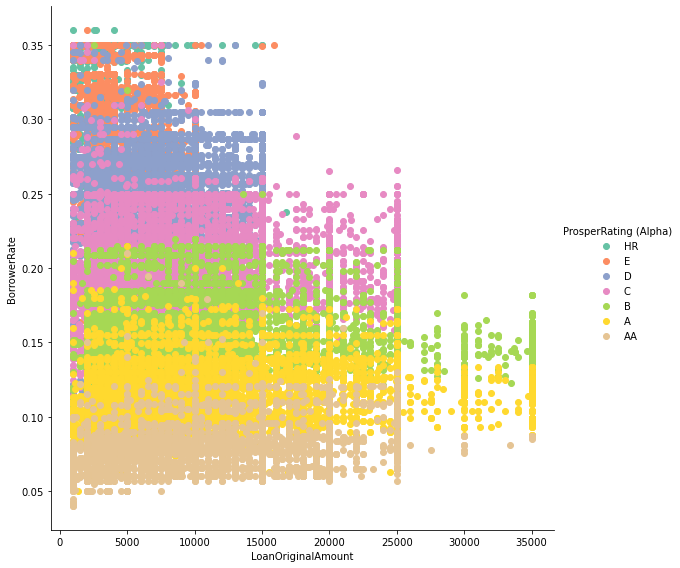

In [92]:
# multivariate plot of rate by loan amount, and ProsperRating
# rate (numerical), loan amount (numerical) and ProsperRating (categorical)
# scatterplot with color encoding

g = sb.FacetGrid(data = loans, hue = 'ProsperRating (Alpha)', size= 8, palette = 'Set2')
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate');
g.add_legend()

text = 'Below $15,000, loans are given out across Prosper Rating and loan amount.  Loans above $15,000 are primarily given to borrowers with C rating or higher.  Loans above $25,000 are mostly for borrowers with B rating or higher.  One interesting obesrvation is that the interest rate for B and A grade borrowers actually declines as loan amount increases, while the rate for highest rated AA loans increases for loans over $25,000.  This suggests that there is another factor which is influencing the rate of borrowers with at least a B grade'
print(text)

Loans above $15,000 are mostly for borrowers with a Full-time job.  Almost all of loans above $25,000 for borrowers with some kind employment  Loans below $5,000 went primarily to retired, part- time workers and the unemployed.


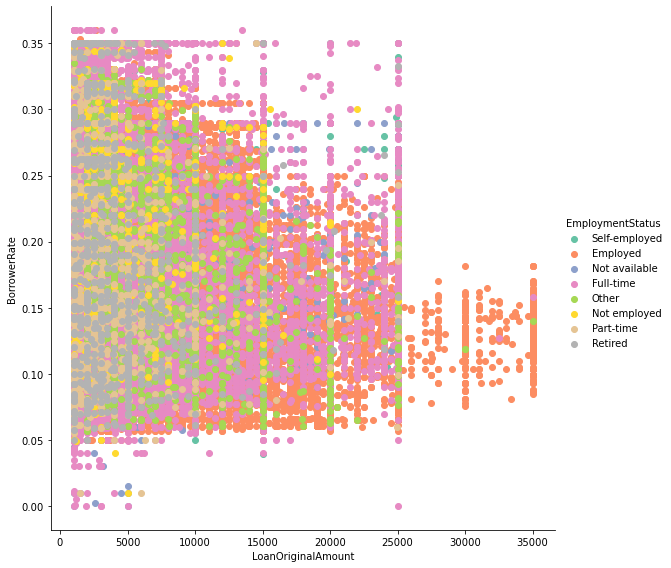

In [93]:
g = sb.FacetGrid(data = loans, hue = 'EmploymentStatus', size= 8, palette = 'Set2')
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate');
g.add_legend()

text = 'Loans above $15,000 are mostly for borrowers with a Full-time job.  Almost all of loans above $25,000 for borrowers with some kind employment  Loans below $5,000 went primarily to retired, part- time workers and the unemployed.'
print(text)

In [94]:
loan_data_sample = loans.sample(500, random_state=42)

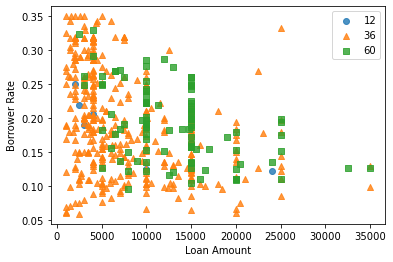

In [95]:
# Term is categorical ordinal 
# loan amount and borrower rate are numeric continuos
ttype_markers = [[12, 'o'],
                 [36, '^'],
                 [60, 's']]

for ttype, marker in ttype_markers: 
    plot_data = loan_data_sample.loc[loan_data_sample['Term'] == ttype]
    sb.regplot(data = plot_data, x = 'LoanOriginalAmount', y = 'BorrowerRate', x_jitter=0.1, fit_reg = False, marker=marker);
plt.xlabel('Loan Amount')
plt.ylabel('Borrower Rate')
plt.legend (['12','36','60'])

Most of the long term loans (60 months) are for 10k and higher loan amounts.  

Typically it is not a good idea to use scatterplots with discrete data because the points on the plot will be overplotted (i.e. points in the visualizations plotting on top of each other). That is, because there are only a finite number of values that X can take, all of the points will lie along those lines. Which means, that it is not possible to interpret the information in this plot even with a small sample size of 500 loans ( see 15k Loan Amount).  

If you do decide to use scatterplot, you should use jitter. Seaborn's .stripplot() allows you to use jitter (and given that it is a multivariate plot, you will also want to use its dodge = True option). 

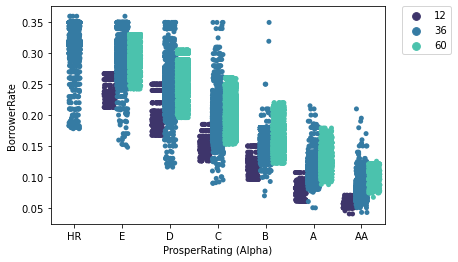

In [96]:
sb.stripplot(data = loans, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', hue ='Term',
    jitter=0.35, dodge=True, palette="mako")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The longer the loan terms, the higher the interest rate within each Loan Rating.  Higher rated borrowers use longer loan terms at lower rates than lower rated borrowers. 

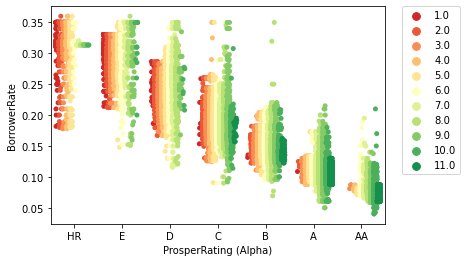

In [97]:
sb.stripplot(data = loans, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', hue ='ProsperScore',
    jitter=0.35, dodge=True, palette="RdYlGn")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

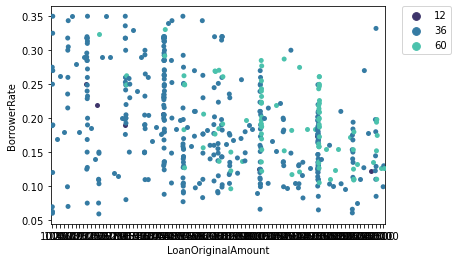

In [98]:
sb.stripplot(data = loan_data_sample , x = 'LoanOriginalAmount', y = 'BorrowerRate', hue ='Term',
    jitter=0.35, dodge=True, palette="mako")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

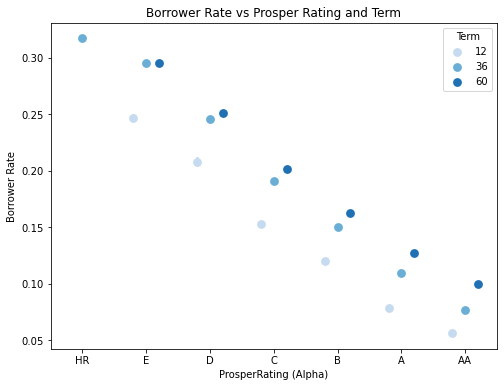

In [99]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Borrower Rate vs Prosper Rating and Term')
plt.ylabel('Borrower Rate')
ax.set_yticklabels([],minor = True)
plt.show();

Longer term loans result in higher rates across all Prosper ratings.

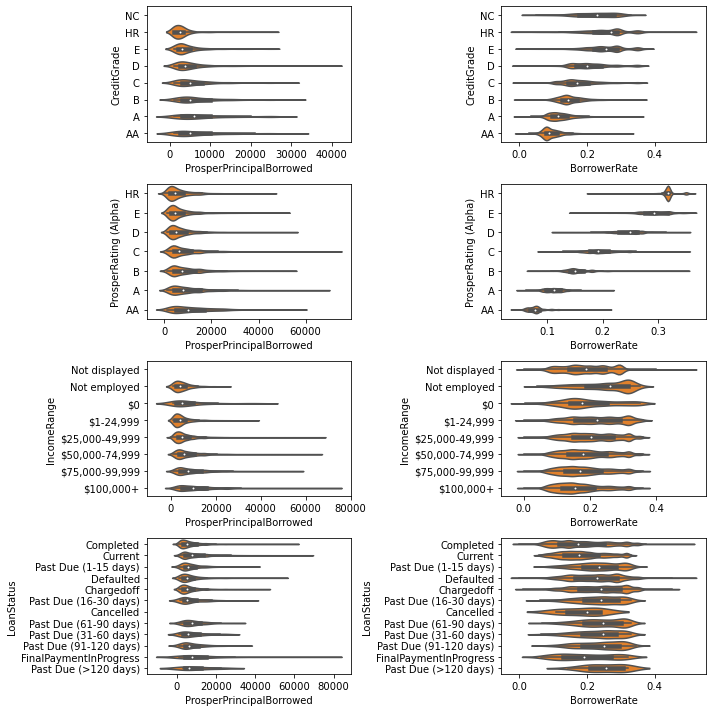

In [100]:
# plot the categorical variables against BorrowerAPR and ProsperPrincipalBorrowed again, this time
# with full data and variable transforms


categoric_vars = ['CreditGrade', 'ProsperRating (Alpha)', 'IncomeRange', 'LoanStatus']
fig, ax = plt.subplots(ncols = 2, nrows = 4 , figsize = [10,10])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    default_color = sb.color_palette()[1]
    sb.violinplot(data = loans, y = var, x = 'ProsperPrincipalBorrowed', ax = ax[i,0],
               color = default_color, orient = "h")
    
    
    sb.violinplot(data = loans, y = var, x = 'BorrowerRate', ax = ax[i,1],
               color = default_color, orient = "h")
    
plt.tight_layout()
plt.show()

Loans that are past due result in higher borrower rates and also smaller Principal amount borrowed.

In [101]:
# Add a new column to extract the year from the loans creation date
loans['listingyear'] = pd.DatetimeIndex(loans['ListingCreationDate']).year
loans['listingyear'].head()

0    2007
1    2014
2    2007
3    2012
4    2013
Name: listingyear, dtype: int64

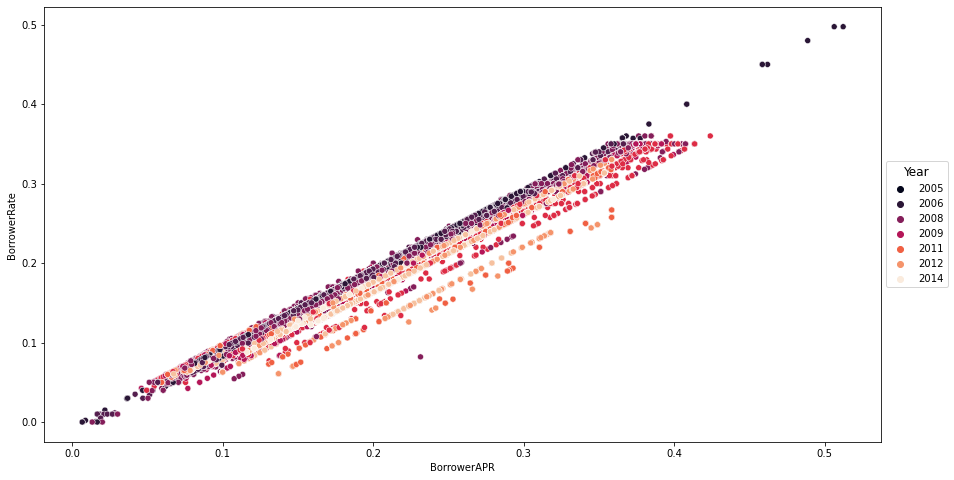

In [102]:
plt.figure(figsize = [15,8])

sb.scatterplot(data = loans, x = 'BorrowerAPR', y = 'BorrowerRate', hue ='listingyear',palette="rocket");
   
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), title='Year', title_fontsize=12);

The year the loan was issused, and overall market conditions has a big impact on the borrower rate

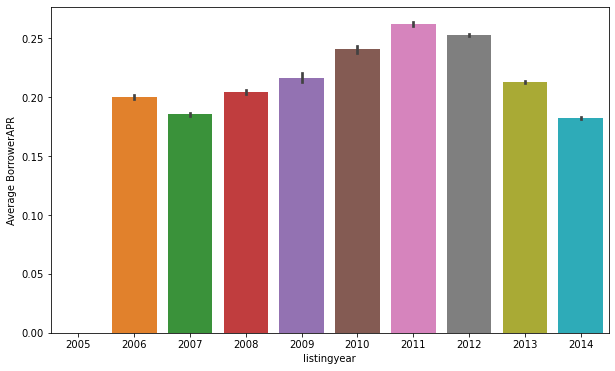

In [106]:
plt.figure(figsize = [10,6])


order=loans.listingyear.value_counts().index[:7]
sb.barplot(data = loans, x = 'listingyear', y = 'BorrowerAPR'),
plt.ylabel("Average BorrowerAPR");

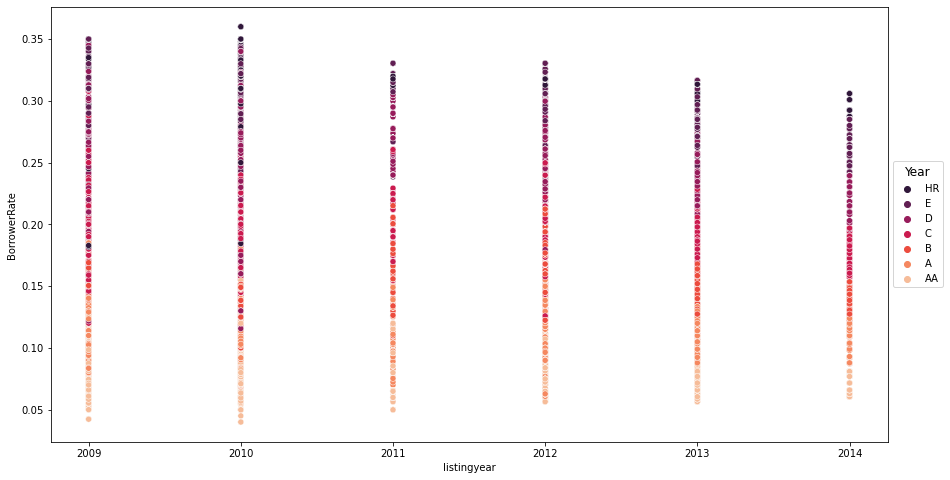

In [108]:
plt.figure(figsize = [15,8])

sb.scatterplot(data = loans, x = 'listingyear', y = 'BorrowerRate', hue ='ProsperRating (Alpha)',palette="rocket");
   
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), title='Year', title_fontsize=12);

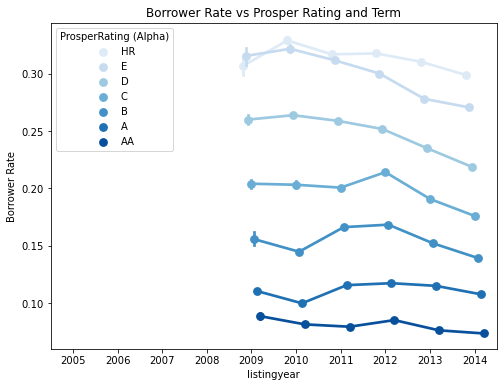

In [110]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans, x = 'listingyear', y = 'BorrowerRate', hue = 'ProsperRating (Alpha)',
           palette = 'Blues', dodge = 0.4)
plt.title('Borrower Rate vs Prosper Rating and Term')
plt.ylabel('Borrower Rate')
ax.set_yticklabels([],minor = True)
plt.show();

Rates trend in the same general direction ( up or down) across Prosper rating on an annual basis.  Lower credit rating (B and lower) seem to be more afftected by the overall market than the higher rateed borrowers.

In [104]:
plt.figure(figsize = [10,6])


order=loans.listingyear.value_counts().index[:7]
ax=sb.barplot(data = order, x = 'listingyear', y = 'BorrowerAPR'),


# if you need the values rounded (here I use int())
for i, v in enumerate(order['BorrowerAPR'].iteritems()):   
    v_new = int(v[1])
    ax.text(i ,v[1], "{:,}".format(v_new),ha='center',color='m');

AttributeError: 'Int64Index' object has no attribute 'get'

<Figure size 720x432 with 0 Axes>

In [ ]:
order['BorrowerAPR'].describe()

In [ ]:
plt.figure(figsize = [20,5])

np.random.seed(2019)
sample = np.random.choice(loans.shape[0], 200, replace = False)
loans_subset = df.loc[sample]

sb.regplot(data = loans_subset, x = 'LoanOriginalAmount', y = 'BorrowerRate', fit_reg = False, 
           scatter_kws = {'s': loans['IncomeRange']}, truncate = True)


sizes = [100, 300, 500]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes)
plt.title('Effect of Original Loan Amount Plus Monthly Income Amount on Interest Rate')
sb.set(font_scale = 5)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!